In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
from PIL import Image
from dataset import *
from save_load import *
from NN_library.AutoUnet.AutoUnet_uniform import *
from NN_library.AutoUnet.train_AutoUnet import *
%load_ext autoreload
%autoreload 2

Using device: cuda


In [2]:
data = dataset_uniform()
geometry, damage, imp_shrinkage, obs_shrinkage, stiffness = data.__getitem__(1000)
loaders = get_loaders(data, 16)

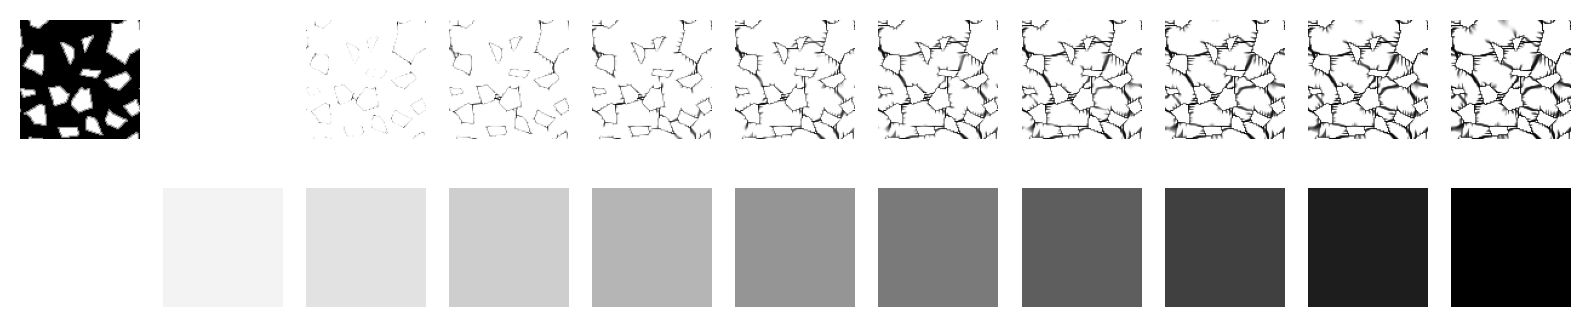

In [14]:
fig, axs = plt.subplots(nrows=2, ncols=11, figsize=(10, 2), dpi=200)
for i in range(11):
    axs[0,i].imshow(damage[i], cmap='Greys')
    axs[0,i].set_axis_off()
    axs[1,i].imshow(imp_shrinkage[i] / (-0.001), cmap='Greys', vmin=0, vmax=1)
    axs[1,i].set_axis_off()
axs[0,0].imshow(geometry[0], cmap='Greys')
axs[0,0].set_axis_off()

In [4]:
name = 'NN_library/AutoUnet/AutoUnet_uniform'
args = {'lr' : 0.000001, 'epochs' : 20, 'dev' : dev, 'name' : name}

In [6]:
unet = AutoUNet()

In [7]:
torch.cuda.empty_cache() 

In [8]:
total_params = sum(p.numel() for p in unet.parameters())
print(f"Number of parameters: {total_params}")

Number of parameters: 7697345


In [9]:
unet = load_network(unet, args['name'], args)

In [ ]:
losses_train, losses_val = train(unet, loaders, args)

In [ ]:
plt.plot(losses_train)
plt.plot(losses_val)
plt.xlabel('epoch')
plt.legend(['train', 'validation'])

## Train with Convnet

In [20]:
from NN_library.ConvNet.ConvNet_uniform import *

name = 'NN_library/AutoUnet/AutoUnet_w_Conv_uniform'
conv_name = 'NN_library/ConvNet/Conv_w_AutoUnet_uniform'

Using device: cuda


In [21]:
args = {'lr' : 0.000001, 'epochs' : 20, 'dev' : dev, 'name' : name, 'conv_name' : conv_name}

In [22]:
unet = AutoUNet()
convnet = ConvNet(16)

In [23]:
convnet = load_network(convnet, 'NN_library/ConvNet/ConvNet_uniform', args)

In [24]:
unet = load_network(unet, 'NN_library/AutoUnet/AutoUnet_uniform', args)  

In [ ]:
losses_train, losses_val = train_w_Conv(unet, convnet, loaders, args)

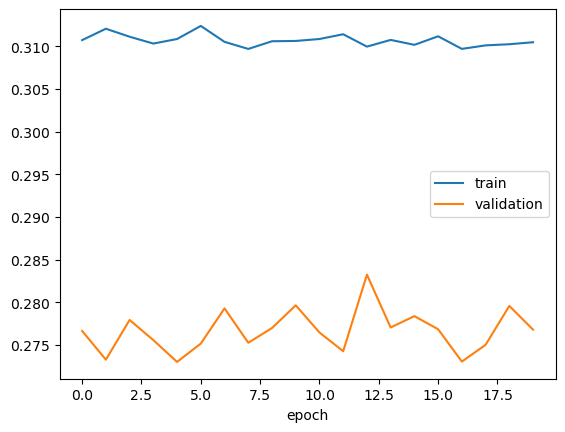

In [23]:
plt.plot(losses_train)
plt.plot(losses_val)
plt.xlabel('epoch')
plt.legend(['train', 'validation'])